In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Load data
true = pd.read_csv('../Dataset_Original/ISOT/True.csv')
fake = pd.read_csv('../Dataset_Original/ISOT/Fake.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# Combine data
true['label'] = 1
fake['label'] = 0
data = pd.concat([true, fake], axis=0, ignore_index=True)

In [5]:
# Remove "date" column because it is not useful for this analysis
data = data.drop('date', axis=1)

# Data overview

In [6]:
# Data exploration
data.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [7]:
print(data['label'].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


# Missing & duplicate values

In [8]:
data.isnull().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [9]:
# Number of unique values in title
num_unique_values = data['title'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

38729/44898


In [10]:
# Number of unique values in text
num_unique_values = data['text'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

38646/44898


# Distribution of title length

In [11]:
data['title_length'] = data['title'].apply(len)
print(data['title_length'].describe())

count    44898.000000
mean        80.111720
std         25.379685
min          8.000000
25%         63.000000
50%         73.000000
75%         91.000000
max        286.000000
Name: title_length, dtype: float64


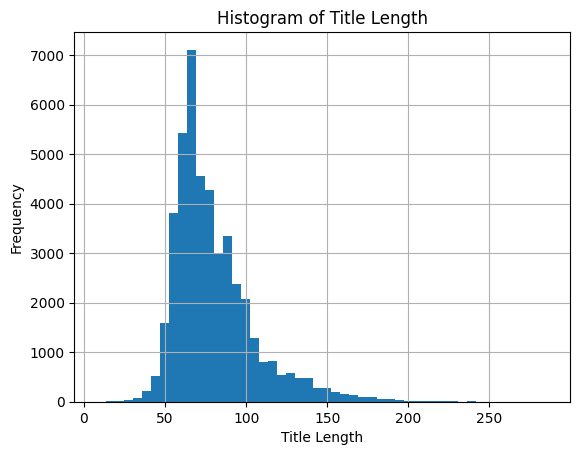

In [12]:
data['title_length'].hist(bins=50)
plt.title('Histogram of Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

In [13]:
min_title_length_data = data[data['title_length']==8]
print("Example with minimum number of characters in title:")
print(f'Title: {min_title_length_data["title"].iloc[0]}')
print(f'Text: {min_title_length_data["text"].iloc[0]}')
print(f'Label: {min_title_length_data["label"].iloc[0]}')

Example with minimum number of characters in title:
Title: Homepage
Text: [vc_row][vc_column width= 1/1 ][td_block_trending_now limit= 5 ][td_block_big_grid sort= featured ][/vc_column][/vc_row][vc_row] [vc_column width= 2/3 ][td_block_5 limit= 24  custom_title= HOT OFF THE PRESS!  td_filter_default_txt= All  ajax_pagination= load_more  border_top= no_border_top ] [/vc_column][vc_column width= 1/3 ][vc_widget_sidebar sidebar_id= td-default ][/vc_column] [/vc_row][vc_row][vc_column width= 1/1 ][td_block_14 limit= 3  custom_title= EVEN MORE NEWS  td_filter_default_txt= All  ajax_pagination= next_prev  header_color= #288abf ][/vc_column] [/vc_row]
Label: 0


In [14]:
max_title_length_data = data[data['title_length']==286]
print("Example with maximum number of characters in title:")
print(f'Title: {max_title_length_data["title"].iloc[0]}')
print(f'Text: {max_title_length_data["text"].iloc[0]}')
print(f'Label: {max_title_length_data["label"].iloc[0]}')

Example with maximum number of characters in title:
Title: THIS IS GREAT! ANTI-HILLARY STREET ART POPS UP EVERYWHERE IN BROOKLYNHillary Clinton’s supporters were calling certain words used to describe her as sexist. Words like entitled, ambitious, and secretive… The area around Hillary’s campaign headquarters was plastered with this:          
Text: Hillary Clinton s supporters were calling certain words used to describe her as sexist. Words like entitled, ambitious, and secretive The area around Hillary s campaign headquarters was plastered with this: 
Label: 0


The minimum title length example should be removed

# Distribution of news length

In [15]:
data['sentence_length'] = data['text'].apply(len)
print(data['sentence_length'].describe())

count    44898.000000
mean      2469.109693
std       2171.617091
min          1.000000
25%       1234.000000
50%       2186.000000
75%       3105.000000
max      51794.000000
Name: sentence_length, dtype: float64


In [16]:
# Describe 'sentence_length' for label 0
print(data[data['label'] == 0]['sentence_length'].describe())
# Describe 'sentence_length' for label 1
print(data[data['label'] == 1]['sentence_length'].describe())

count    23481.000000
mean      2547.396235
std       2532.884399
min          1.000000
25%       1433.000000
50%       2166.000000
75%       3032.000000
max      51794.000000
Name: sentence_length, dtype: float64
count    21417.000000
mean      2383.278517
std       1684.835730
min          1.000000
25%        914.000000
50%       2222.000000
75%       3237.000000
max      29781.000000
Name: sentence_length, dtype: float64


## Below 10 characters

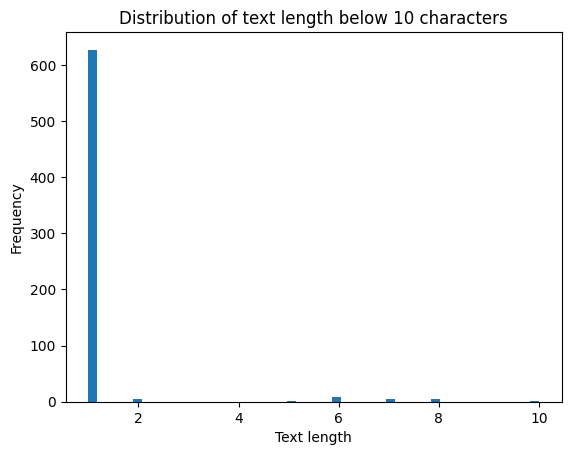

In [17]:
plt.hist(data['sentence_length'], bins=50, range=[1, 10])
plt.title('Distribution of text length below 10 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(data[data['sentence_length']<=2]['text'])

8970      
32340     
32458     
32607     
32642     
        ..
43233     
43243     
43244     
43274     
43290     
Name: text, Length: 631, dtype: object


In [19]:
print(data[(data['sentence_length']>2) & (data['sentence_length']<10)]['text'])

32534      Enjoy:
32934      Enjoy:
33102      Watch:
33213     Watch: 
33264    Via: NPR
33429     Via: WT
33480      Enjoy 
33591      Watch:
33750       Ouch!
33987    Via: TMZ
34027    Via: TMZ
34142     Via: GP
37678    Via: NPR
37695     Via: WT
40222      Enjoy:
40467      Enjoy:
40573      Watch:
40652     Watch: 
40817      Enjoy 
40989       Ouch!
41134    Via: TMZ
Name: text, dtype: object


## From 10 to 100 characters

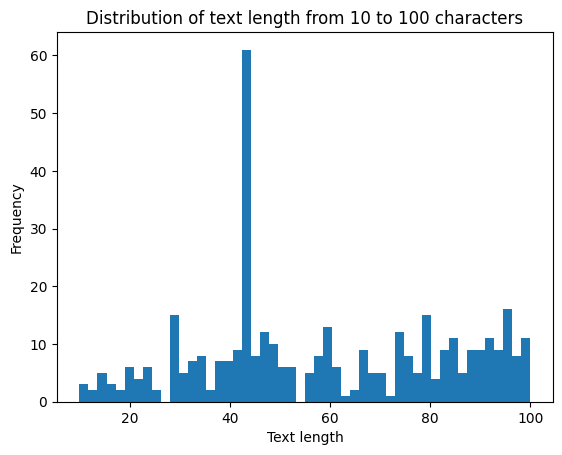

In [20]:
plt.hist(data['sentence_length'], bins=50, range=[10, 100])
plt.title('Distribution of text length from 10 to 100 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [21]:
print(data[data['sentence_length']==43]['text'])

32668    https://www.youtube.com/watch?v=cJZFepSvxzM
32703    https://www.youtube.com/watch?v=-7Tn4gi_Os8
32732    https://www.youtube.com/watch?v=SH0pRtK9sAE
32733    https://www.youtube.com/watch?v=DRLVvYzG46w
32745    https://www.youtube.com/watch?v=Ws5ojb0PCCo
32804    https://www.youtube.com/watch?v=P-TBfkqk7gU
32909    https://www.youtube.com/watch?v=n9tfNMQpYWU
32930    https://www.youtube.com/watch?v=PjeOoJyPNCk
32987    https://www.youtube.com/watch?v=J4LjxrOfEF8
33043    https://www.youtube.com/watch?v=uCS4RB9G13M
33065    THIS IS OUTRAGEOUS! YOU WON T BELIEVE THIS!
33106    https://www.youtube.com/watch?v=ISm-p8e-D7I
33112    https://www.youtube.com/watch?v=VkRCtn0nEvU
33129    https://www.youtube.com/watch?v=8Mehk5eWcZA
33141    https://www.youtube.com/watch?v=rUr8pYr5AXs
33147    https://www.youtube.com/watch?v=zZ7GrEItGoo
33211    https://www.youtube.com/watch?v=gqxwF-TeYas
33221    https://www.youtube.com/watch?v=aHkNzBRqPCE
33245    https://www.youtube.com/watch?v=EOr9f

Need to remove url

## Above 100 characters

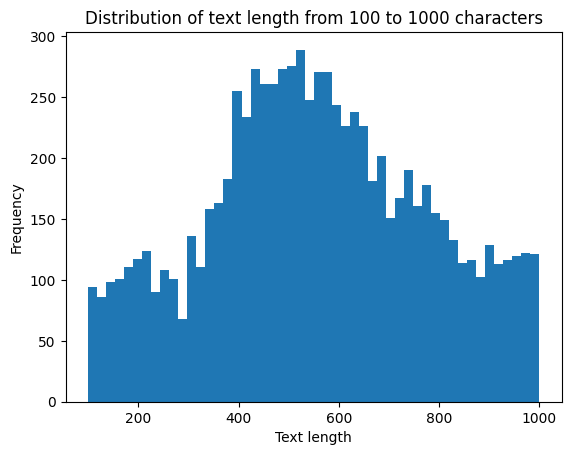

In [22]:
plt.hist(data['sentence_length'], bins=50, range=[100, 1000])
plt.title('Distribution of text length from 100 to 1000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

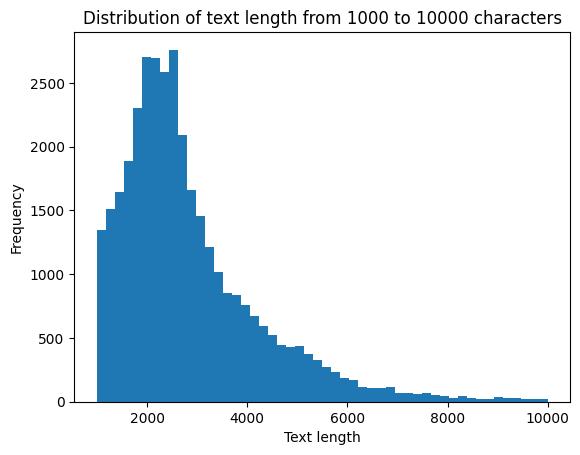

In [23]:
plt.hist(data['sentence_length'], bins=50, range=[1000, 10000])
plt.title('Distribution of text length from 1000 to 10000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

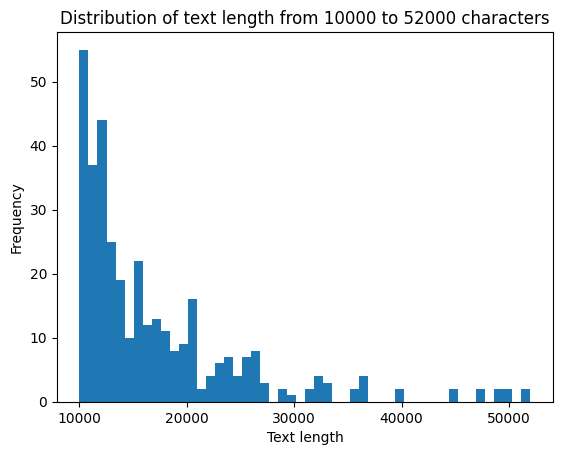

In [24]:
plt.hist(data['sentence_length'], bins=50, range=[10000, 52000])
plt.title('Distribution of text length from 10000 to 52000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

## Sentence length and label correlation

In [25]:
print("Example with text length below 100 characters label distribution:")
texts = data[data['text'].str.len() < 100]
label_distribution = texts['label'].value_counts()
print(label_distribution)

Example with text length below 100 characters label distribution:
label
0    1039
1       1
Name: count, dtype: int64


In [26]:
print("Example with text length from 100 to 1000 characters label distribution:")
texts = data[(data['text'].str.len() >= 100) & (data['text'].str.len() <= 1000)]
label_distribution = texts['label'].value_counts()
print(label_distribution)

Example with text length from 100 to 1000 characters label distribution:
label
1    5631
0    2784
Name: count, dtype: int64


In [27]:
print("Example with text length beyond 10000 characters label distribution:")
long_texts = data[data['text'].str.len() > 10000]
label_distribution = long_texts['label'].value_counts()
print(label_distribution)

Example with text length beyond 10000 characters label distribution:
label
0    328
1     24
Name: count, dtype: int64


In [28]:
print("Example with text length beyond 30000 characters label distribution:")
long_texts = data[data['text'].str.len() > 30000]
label_distribution = long_texts['label'].value_counts()
print(label_distribution)

Example with text length beyond 30000 characters label distribution:
label
0    27
Name: count, dtype: int64


# Wordcloud of news titles & texts

In [29]:
# Join all the text in 'title' into a single string
true_title = ' '.join(data[data['label']==1]['title'])
true_text = ' '.join(data[data['label']==1]['text'])
fake_title = ' '.join(data[data['label']==0]['title'])
fake_text = ' '.join(data[data['label']==0]['text'])

In [30]:
# Plot function
def plot_wordcloud(type):
    wordcloud = WordCloud(width=800, height=600,
                        background_color='white',
                        stopwords=None,
                        min_font_size=10).generate(type)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

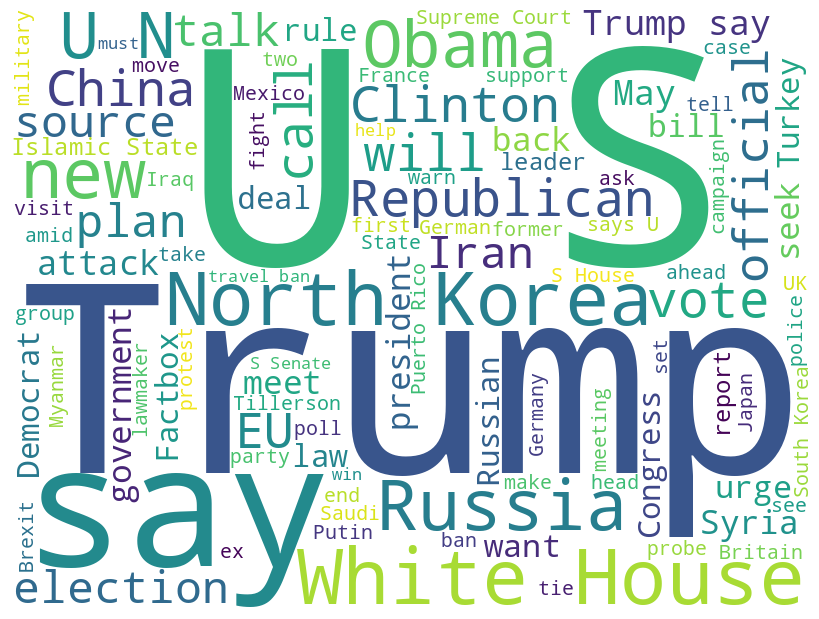

In [31]:
plot_wordcloud(true_title)

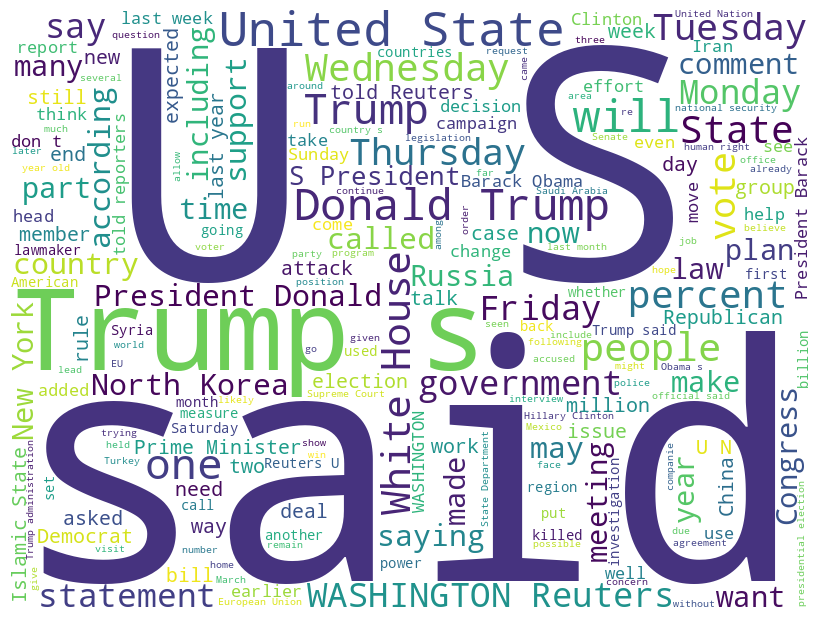

In [32]:
plot_wordcloud(true_text)

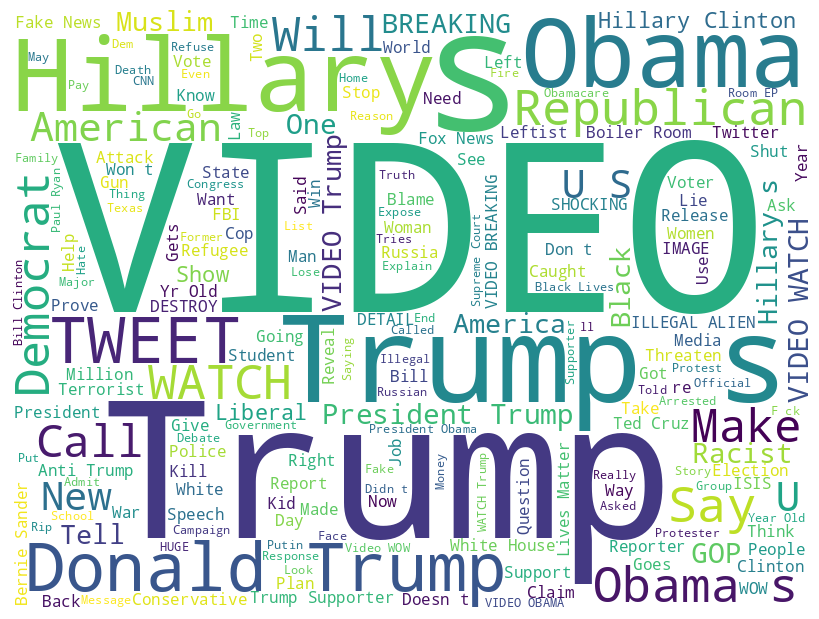

In [33]:
plot_wordcloud(fake_title)

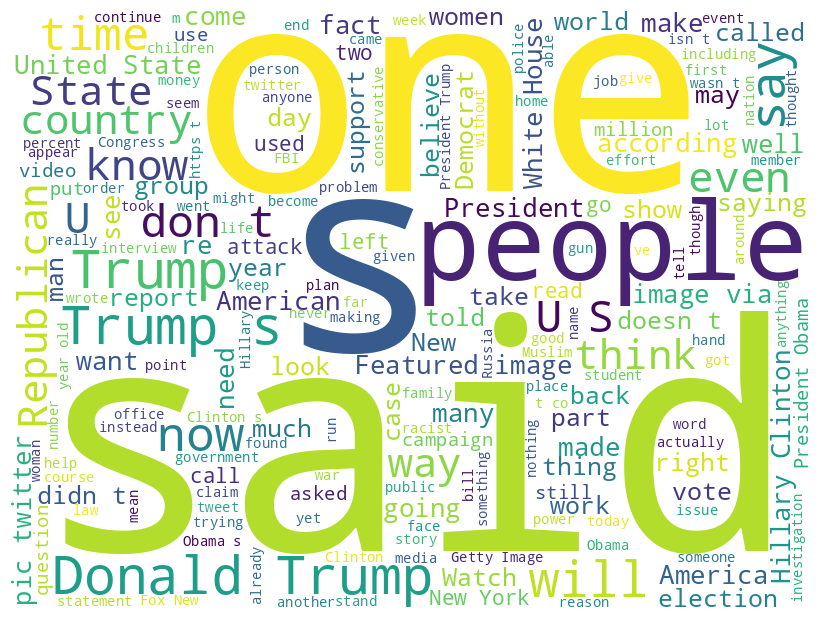

In [34]:
plot_wordcloud(fake_text)